In [2]:
import ast
import numpy as np

a = 'S03Track/c010/tracking_DeepSort.txt'

b = 'S03Track/c010/calibration.txt'

with open(b, 'r') as f:
    lines = f.readlines()
    H = np.array([[float(val) for val in lines[0].strip().replace(';', ' ').split(' ')]])
    H = H.reshape((3, 3)).astype(np.float32)
    H_inv = np.linalg.inv(H)

frame_info = {}
with open(a, 'r') as f:
    for line in f:
        frame, id, x, y, w, h, _, _, _, _ = line.strip().split(',')

        frame = int(frame)
        id = int(id)
        x = float(x)
        y = float(y)
        w = float(w)
        h = float(h)

        gps = np.array([x + w/2, y + h/2, 1]).T
        gps = H_inv@gps
        gps = gps / gps[2]
        
        if frame not in frame_info:
            frame_info[frame] = {}

        frame_info[frame][id] = [gps[:2], [x, y, w, h]]

In [19]:
print(H)

[[-8.2301727e+01  1.5964297e+02  1.7973029e+04]
 [-4.1691747e+00  2.0775242e+00  3.6556476e+02]
 [ 1.3477300e-02  1.7345000e-02  1.0000000e+00]]


In [3]:
for frame in frame_info:
    print(frame, frame_info[frame])
    break

3 {1: [array([ 42.49748344, -90.67348965]), [1283.42, 362.0, 235.93, 184.0]], 2: [array([ 42.49789674, -90.67336416]), [473.68, 214.8, 46.21, 115.97]], 3: [array([ 42.49853585, -90.67295489]), [562.0, 94.0, 98.0, 75.0]], 4: [array([ 42.49868912, -90.67274371]), [928.98, 77.98, 84.06, 68.02]]}


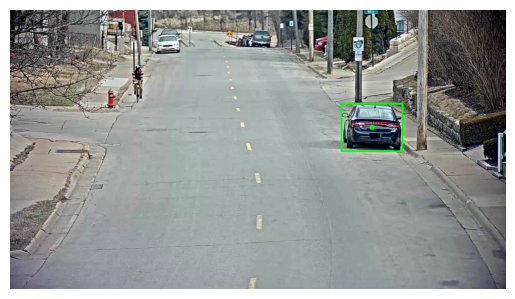

In [16]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('S03Track/c010/frames/frame00003.png')

bbox = frame_info[3][1][1]

cv2.rectangle(img, (int(bbox[0]), int(bbox[1])), (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3])), (0, 255, 0), 5)

cv2.circle(img, (int(bbox[0] + bbox[2]/2), int(bbox[1] + bbox[3]/2)), 10, (0, 255, 0), -1)

plt.axis('off')
plt.imshow(img[:, :, ::-1])

In [18]:
print(centre)

[1401.385  454.   ]


In [17]:
gps = frame_info[3][1][0]
print(gps)

[ 42.49748344 -90.67348965]
